# Task 2: Sales Prediction with Machine Learning
## Using Python Multiple Linear Regression Model and Lasso Rgeression

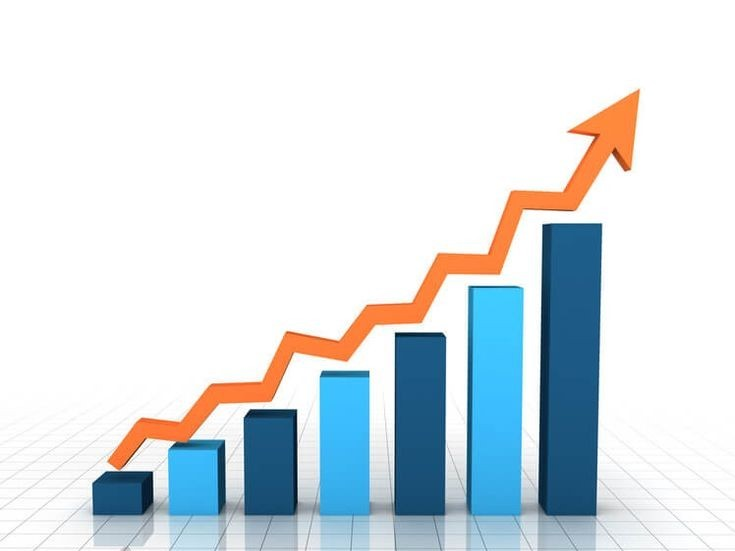

## Problem Statement
    - Sales Prediction means predicting how much of a product people will buy based on facors such as: 
      the amount you spend to advertise your product, 
      the segment of people you advertise for, 
      or the platform you are advertising on about your product.
    - The task is to train a machine model to predict sales based on the advertisement facors (TV, Radio, and Newspaper)

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the sales advertisment data
df = pd.read_csv(r'C:\Users\user\Desktop\GD\tutorials\Data Science\Oasis\advertising (sales prediction dataset)\Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# making a copy of the data
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# dropping unanted column
df_copy.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df_copy.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# taking a descriptive statistics
df_copy.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


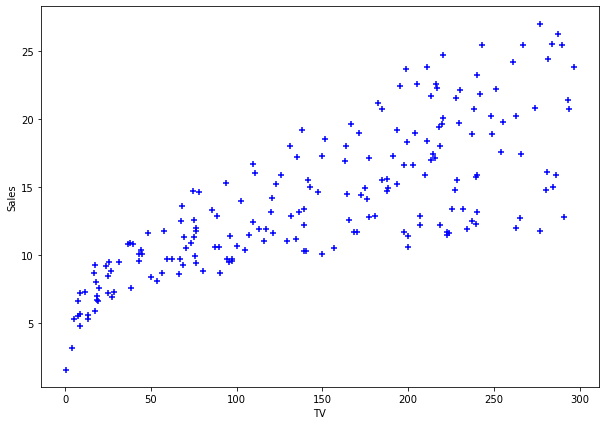

In [9]:
# visualizing the sales vs TV ads using scatter plot
plt.figure(figsize = (10, 7))
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(df_copy['TV'], df_copy['Sales'], color = 'blue', marker = '+')
plt.show()

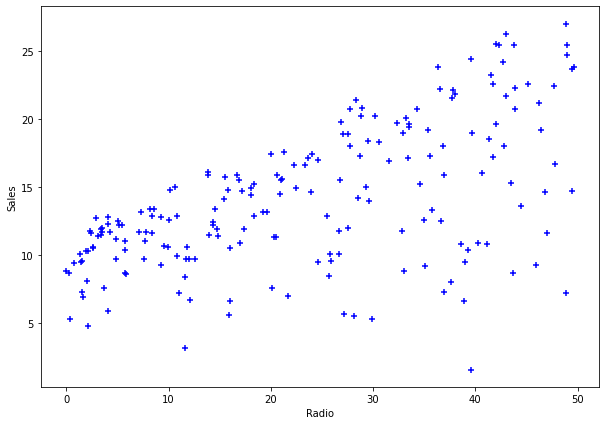

In [10]:
# visualizing the sales vs Radio ads using scatter plot
plt.figure(figsize = (10, 7))
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.scatter(df_copy['Radio'], df_copy['Sales'], color = 'blue', marker = '+')
plt.show()

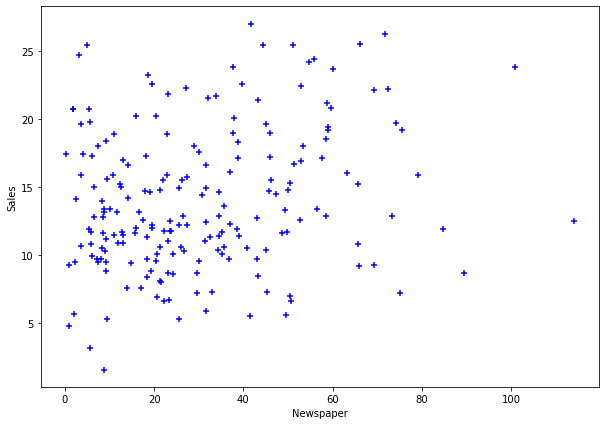

In [11]:
# visualizing the sales vs Newspaper ads using scatter plot
plt.figure(figsize = (10, 7))
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.scatter(df_copy['Newspaper'], df_copy['Sales'], color = 'blue', marker = '+')
plt.show()

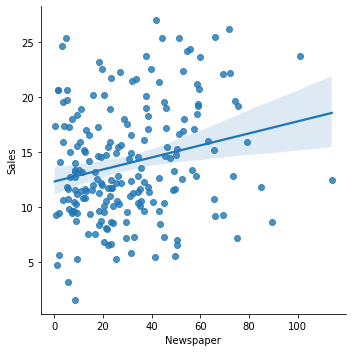

In [12]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df_copy)
plt.show()

### Spliting the data into 'X-Independent variable' and 'y-target variable' 

In [13]:
# splitting our data into 'y-dependent' and 'X-independent'
X = df_copy.iloc[:, 0:3]
y = df_copy.iloc[:, 3]

### splitting the 'X' and 'y' variables into training and testing data set using train_test_split method

In [14]:
# importing the sklearn train_test_slpit
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

### Applying Multiple Linear Regression for our model training

In [16]:
# importing linaer regression
from sklearn.linear_model import LinearRegression

In [17]:
# assigning our model variable and fitting it
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [39]:
#creating a variable for our test data prediction
y_pred_test = mlr.predict(X_test)

#creating a variable for our training data prediction
y_pred_train = mlr.predict(X_train)

### Intoducing the "Mean_Absolute_Error" & "Mean_Squared_Error" to further check the accuracy of the model

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean_absolute_error measures the avarage absolute difference between the predicted values and the actual values

In [20]:
#model accuracy of the test data
model_accuracy_test = r2_score(y_test, y_pred_test) 

#model accuracy of the training data
model_accuracy_train = r2_score(y_train, y_pred_train)

In [21]:
#model accuracy for the test data
print('Model Test Accuracy:', model_accuracy_test * 100)

Model Test Accuracy: 85.68542870042718


In [22]:
#model accuracy for the training data 
print('Model Training Accuracy:', model_accuracy_train * 100)

Model Training Accuracy: 91.49231325447825


In [23]:
#checking for the Mean_absolute_error
mean_absolute_error(y_test, y_pred_test)

1.5030135035019563

In [24]:
#checking for the Mean_squared_error
mean_squared_error(y_test, y_pred_test)

4.763125884695189

In [25]:
#checking the coefficients
mlr.coef_

array([ 0.04239408,  0.19456989, -0.00125515])

In [26]:
# checking the intercept
mlr.intercept_

3.407990314237381

### visualizing the actual and predicted prices for the training data

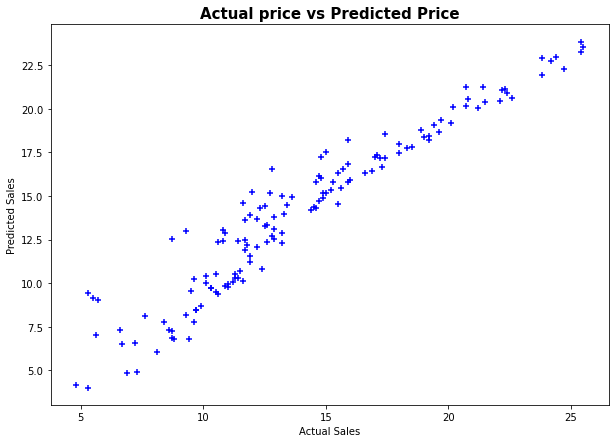

In [27]:
# visualizing using scatter plot
plt.figure(figsize = (10, 7))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.scatter(y_train, y_pred_train, color = 'blue', marker = '+')
plt.title('Actual price vs Predicted Price', fontsize = 15, fontweight = 'bold')
plt.show()

### visualizing actual and predicted prices for the test data

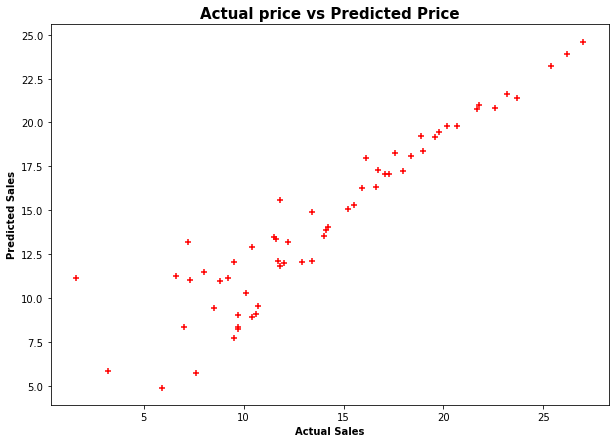

In [28]:
# visualizing using scatter plot
plt.figure(figsize = (10, 7))
plt.xlabel('Actual Sales', fontweight = 'bold')
plt.ylabel('Predicted Sales', fontweight = 'bold')
plt.scatter(y_test, y_pred_test, color = 'red', marker = '+')
plt.title('Actual price vs Predicted Price', fontsize = 15, fontweight = 'bold')
plt.show()

## Applying Lasso Regression for our model training

In [29]:
# importing lasso regression
from sklearn.linear_model import Lasso

In [30]:
lass_reg = Lasso()

In [31]:
lass_reg.fit(X_train, y_train)

Lasso()

In [32]:
# creating a variable for our test data prediction
y_pred_test_lasso = lass_reg.predict(X_test)

# creating a variable for our training data prediction
y_pred_train_lasso = lass_reg.predict(X_train)

In [33]:
#model accuracy of the test data
print('Model Test Accuracy:', r2_score(y_test, y_pred_test_lasso) * 100)

Model Test Accuracy: 85.73686138333963


In [34]:
#model accuracy of the training data
print('Model Training Accuracy:', r2_score(y_train, y_pred_train_lasso) * 100)

Model Training Accuracy: 91.47052946269815


In [35]:
# taking the mean_absolute_error
mean_absolute_error(y_test, y_pred_test_lasso)

1.5151272223931258

In [36]:
#taking the mean_squared_error
mean_squared_error(y_test, y_pred_test_lasso)

4.746011830898351

In [37]:
# checking the intercept
lass_reg.intercept_

3.500558663301158

In [38]:
# checking the coefficient
lass_reg.coef_

array([0.04228922, 0.18933358, 0.        ])